In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from subprocess import check_output

%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\admin\Documents\AML\data\pima-data.csv")

diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']
X = data[feature_columns].values
y = data[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [3]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
NB_EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 16

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=8, activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# 3nd layer: 12 nodes, RELU
model.add(Dense(12, activation='relu'))
# 3nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
#metric = 'val_accuracy'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training...

Epoch 00001: val_accuracy improved from -inf to 0.57576, saving model to pima-weights.best.hdf5

Epoch 00002: val_accuracy improved from 0.57576 to 0.58009, saving model to pima-weights.best.hdf5

Epoch 00003: val_accuracy improved from 0.58009 to 0.63636, saving model to pima-weights.best.hdf5

Epoch 00004: val_accuracy did not improve from 0.63636

Epoch 00005: val_accuracy improved from 0.63636 to 0.65368, saving model to pima-weights.best.hdf5

Epoch 00006: val_accuracy did not improve from 0.65368

Epoch 00007: val_accuracy did not improve from 0.65368

Epoch 00008: val_accuracy improved from 0.65368 to 0.66234, saving model to pima-weights.best.hdf5

Epoch 00009: val_accuracy did not improve from 0.66234

Epoch 00010: val_accuracy did not improve from 0.66234

Epoch 00011: val_accuracy did not improve from 0.66234

Epoch 00012: val_accuracy did not improve from 0.66234

Epoch 00013: val_accuracy did not improve from 0.66234

Epoch 00014: val_accuracy did not

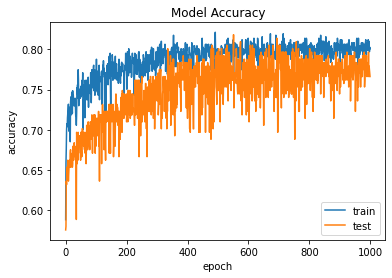

In [19]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

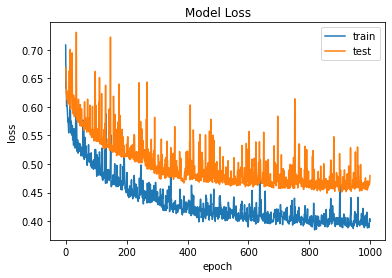

In [20]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [29]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.62%
